In [2]:
import numpy as np
from random import gauss
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from scipy.stats import norm
import statistics
import time 

difficle car on ne sait pas si $X_t$ est > 0 ou négatif selon l'équation 2 

Mais la première équation va nous dire si positif ou négatif 

On crée les couples $(X_{0:t},Y_{0:t})$ :

In [3]:
# Constantes

R = 1
Q = 1
T = 50
X_0 = 1

In [4]:
def couple(t,X_0):
    observations = np.zeros((t,2))
    observations[0,0] = X_0
    observations[0,1] = observations[0,0]**2/20 + gauss(0,R)

    for k in range(1,t):
        observations[k,0] = 0.5*observations[k-1,0]+25*observations[k-1,0]/(1+observations[k-1,0]**2)+8*np.cos(1.2*k) + gauss(0,Q) # X_t
        observations[k,1] = observations[k,0]**2/20 + gauss(0,R) # Y_t

    return observations[:,0],observations[:,1]

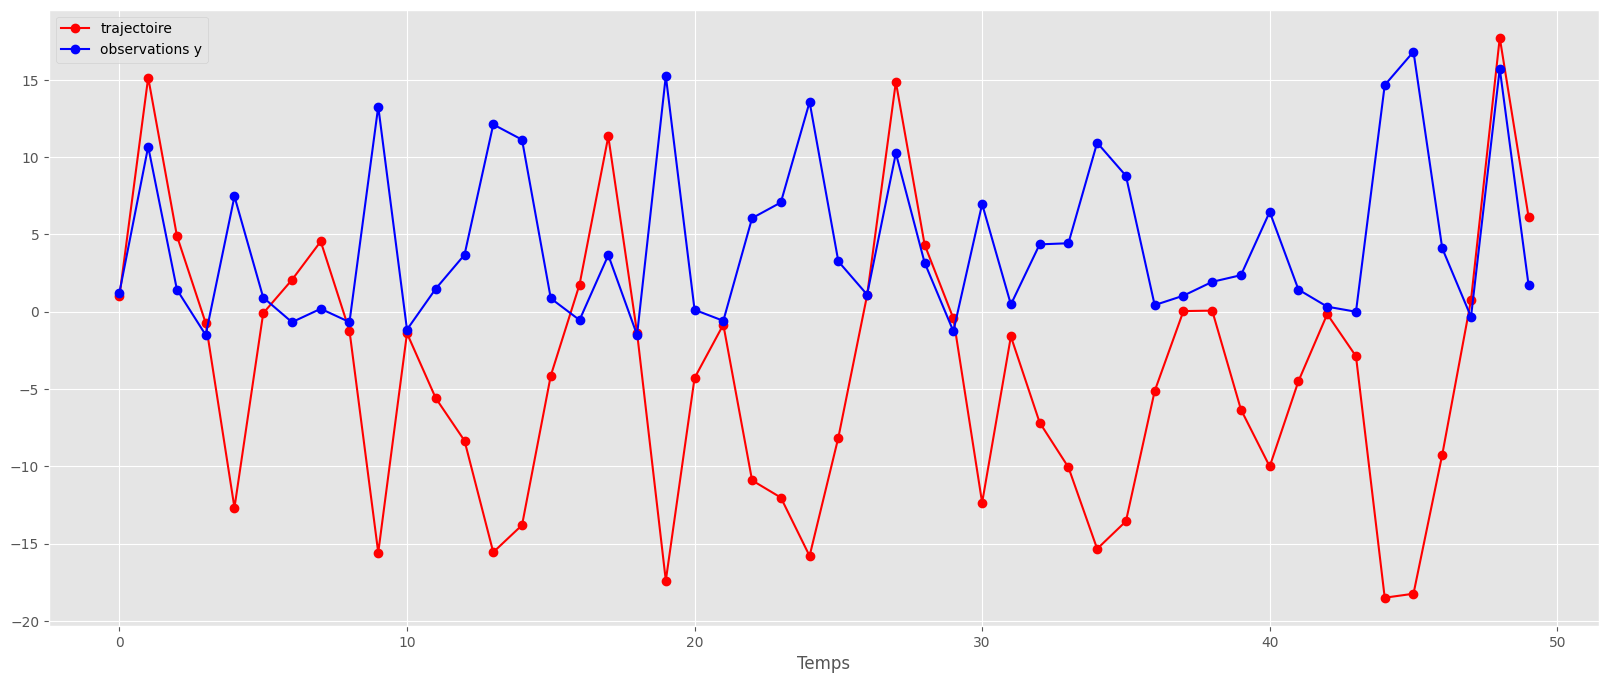

In [5]:
x,y=couple(T,X_0)
L_t=[t for t in range(T)]

plt.figure(figsize=(20,8))
plt.plot(L_t,x,'-o',color='red',label='trajectoire')
plt.plot(L_t,y,'-o',color='b',label='observations y')
plt.xlabel('Temps')
plt.legend()
plt.show()

On suppose maintenant qu'on ait que les observations 

In [6]:
def filtrage_particulaire(T,Y,N):
    # N est le nombre de particules

    X_0 = np.random.randn(N)
    X = np.zeros((T,N))

    w_0 = norm.pdf(Y[0],X_0**2/20,R)
    w_0 = w_0/(w_0.sum())
    W = np.zeros((T,N))
    W[0,:] += w_0
    
    for t in range(1,T):
        A = np.random.choice(range(N),N,p=W[t-1,:])
           
        X[t,:] = np.random.normal(0.5*X[t-1][A]+25*X[t-1][A]/(1+X[t-1][A]**2)+8*np.cos(1.2*t),Q,N)
            
        W[t,:] = norm.pdf(Y[t],X[t,:]**2/20,R)
        W[t,:] = W[t,:]/(W[t,:].sum()) 

    return W,X

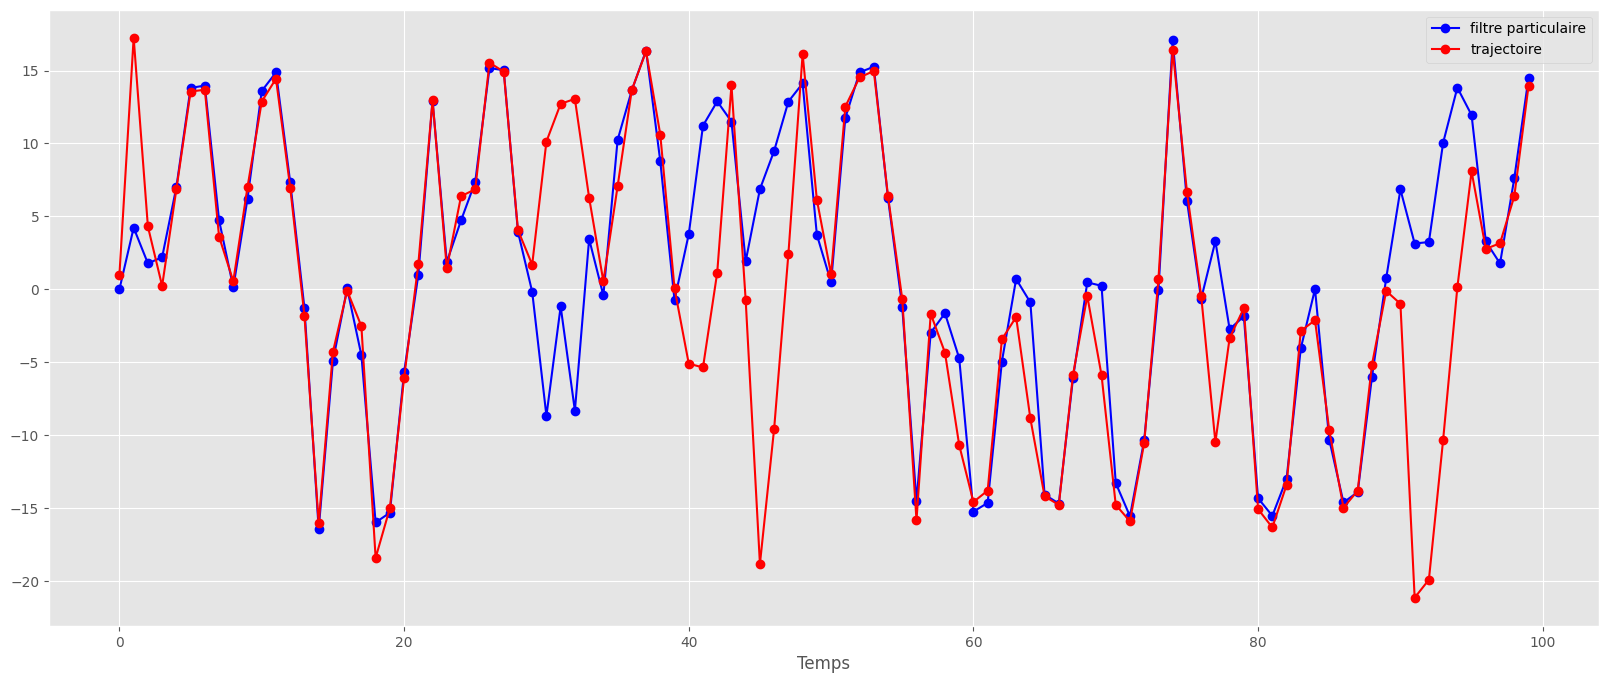

In [7]:
T = 100
N = 10
x,y=couple(T,1)
L_t=[t for t in range(T)]

W,X = filtrage_particulaire(T,y,N)

matrice = W*X 
L = []
for t in range(T):
    L.append(matrice[t,:].sum())

plt.figure(figsize=(20,8))
plt.plot(L_t,L,'-o',color='blue',label='filtre particulaire')
plt.plot(L_t,x,'-o',color='red',label='trajectoire')
#plt.plot(L_t,y,'-o',color='g',label='observations')
#plt.plot(L_t,y,'-o',color='g',label='observation')
plt.xlabel('Temps')
plt.legend()
plt.show()

### Erreur Quadratique Moyenne

In [8]:
def EQM(L,x):
    res = []
    T = len(L)
    for t in range(T):
        res.append((x[t]-L[t])**2)
    return res

def EQM_NN(LL,x):
    # calcul de l'EQM pour NN particules
    res = []
    for L in LL:
        res.append(statistics.mean(EQM(L,x)))
    return res

In [9]:
T = 100
NN = 100
x,y=couple(T,1)
L_t=[t for t in range(T)]
LL = []
for N in range(1,NN+1):
    W,X = filtrage_particulaire(T,y,N)

    matrice = W*X 
    L = []
    for t in range(T):
        L.append(matrice[t,:].sum())
    LL.append(L)

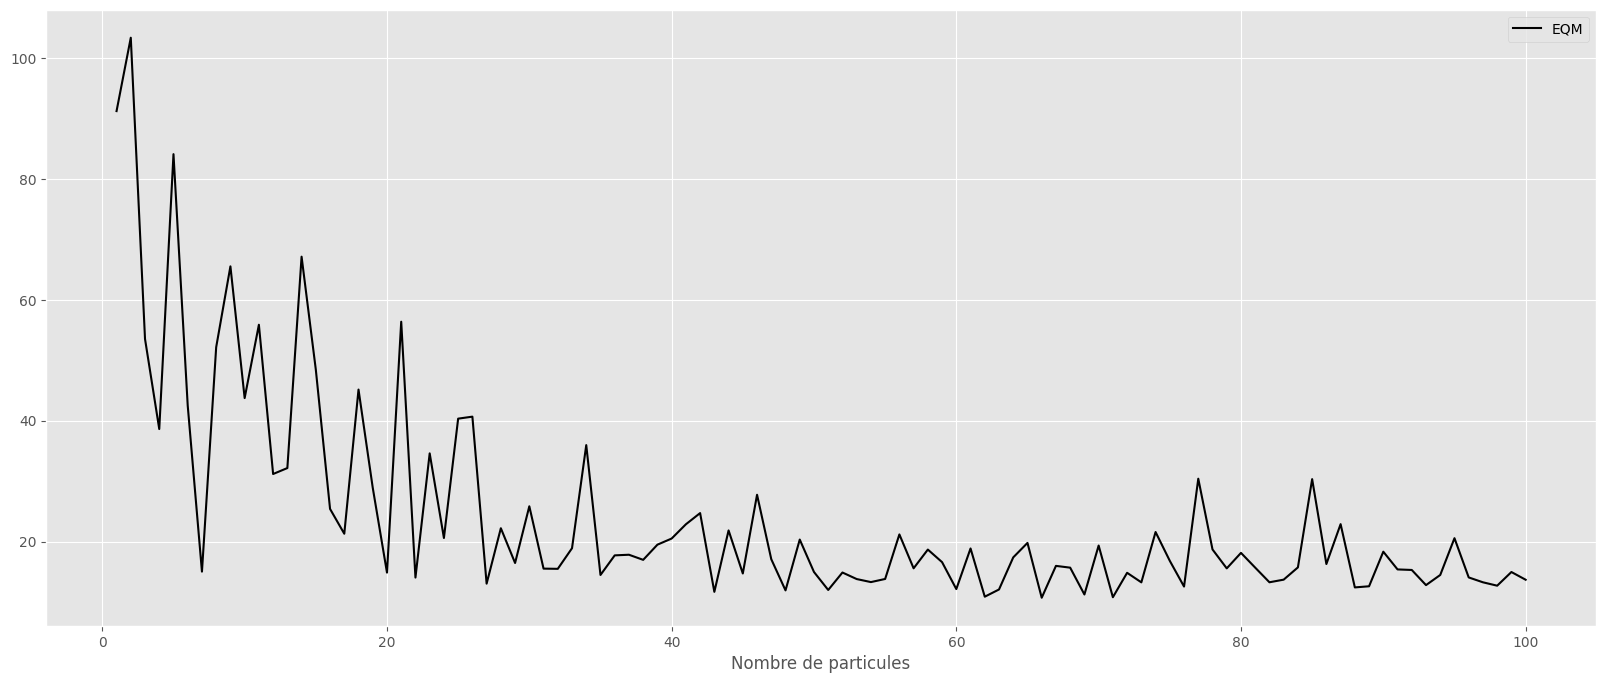

In [10]:
plt.figure(figsize=(20,8))

# EQM 
plt.plot(range(1,NN+1),EQM_NN(LL,x),'-',color='black',label='EQM')

# EQM sommé
#plt.plot(range(1,NN+1),[sum(EQM_NN(LL,x)[:i]) for i in range(1,NN+1)],'-',color='blue',label='EQM')

plt.xlabel('Nombre de particules')
plt.legend()
plt.show()

In [12]:
T = 100
NN = 100
NNN = 100
matrix = np.zeros((NNN,NN))

L_max = []
L_min = []

for j in range(NNN):
    print(j)
    x,y=couple(T,1)
    L_t=[t for t in range(T)]
    LL = []
    for N in range(1,NN+1):
        W,X = filtrage_particulaire(T,y,N)

        matrice = W*X 
        L = []
        for t in range(T):
            L.append(matrice[t,:].sum())
        LL.append(L)

    matrix[j,:] += EQM_NN(LL,x)

L_moyenne = [statistics.mean(matrix[:,i]) for i in range(NN)]
L_max = [max(matrix[:,i]) for i in range(NN)]
L_min = [min(matrix[:,i]) for i in range(NN)]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
plt.figure(figsize=(20,8))
plt.plot(range(1,NN+1),L_moyenne,'-',color='black',label='moyenne EQM pour ' + str(NNN) +' trajectoires différentes')
plt.plot(range(1,NN+1), L_max,'--',color='blue',label='max EQM pour ' + str(NNN) +' trajectoires différentes')
plt.plot(range(1,NN+1), L_min,'--',color='blue',label='min EQM pour ' + str(NNN) +' trajectoires différentes')
plt.fill_between(range(1,NN+1), L_max, L_min,color='#539ecd')
plt.xlabel('Nombre de particules')
plt.legend()
plt.show()

### Temps d'exécution

In [ ]:
T = 100
NN = 250
precision = 100
L_res = []
L_max = []
L_min = []

for N in range(1,NN+1):
    print(N)
    L_temps = []

    for _ in range(precision):

        x,y = couple(T,1)

        start = time.time()
        W,X = filtrage_particulaire(T,y,N)

        matrice = W*X 
        L = []
        for t in range(T):
            L.append(matrice[t,:].sum())
        
        L_temps.append(time.time()-start)
    
    L_res.append(statistics.mean(L_temps))
    L_max.append(max(L_temps))
    L_min.append(min(L_temps))

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(range(1,NN+1),L_res,'-',color='orange',label='moyenne des durées d\'exécution sur ' + str(precision) + ' applications du filtre particulaire')
plt.plot(range(1,NN+1), L_max,'--',color='blue',label='max des durées d\'exécution sur ' + str(precision) + ' applications du filtre particulaire')
plt.plot(range(1,NN+1), L_min,'--',color='blue',label='min des durées d\'exécution sur ' + str(precision) + ' applications du filtre particulaire')
plt.fill_between(range(1,NN+1), L_max, L_min,color='#539ecd')
plt.xlabel('Nombre de particules')
plt.legend()
plt.show()